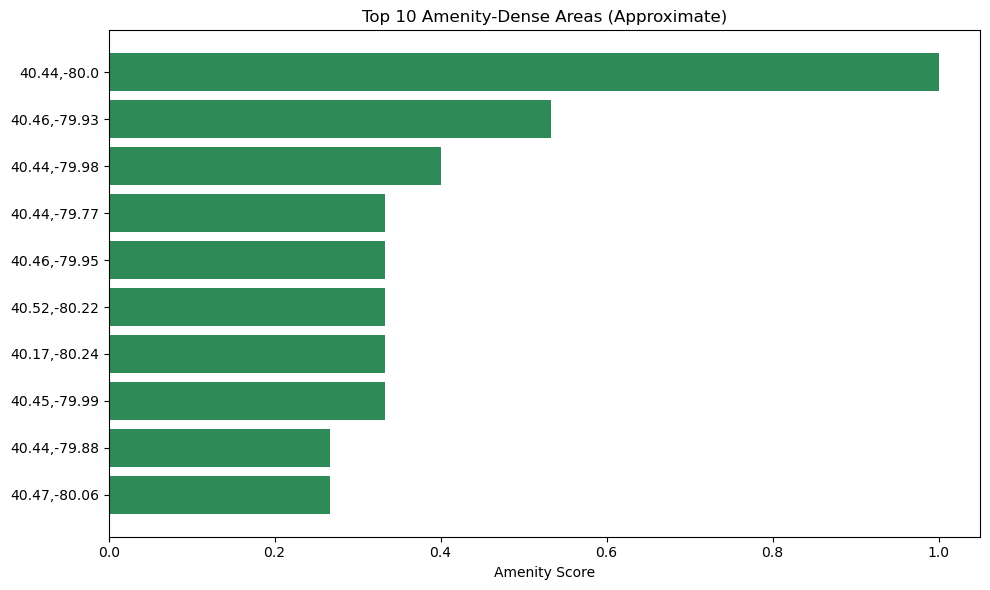

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/amenities.csv")
df = df[df['Lat'].notna() & df['Lon'].notna()]

df['location_block'] = df['Lat'].round(2).astype(str) + "," + df['Lon'].round(2).astype(str)

block_counts = df['location_block'].value_counts().reset_index()
block_counts.columns = ['location_block', 'amenity_count']

block_counts['score'] = (
    (block_counts['amenity_count'] - block_counts['amenity_count'].min()) /
    (block_counts['amenity_count'].max() - block_counts['amenity_count'].min())
)

block_counts.to_csv("data/amenity_scores.csv", index=False)

top10 = block_counts.sort_values("score", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10["location_block"], top10["score"], color="seagreen")
plt.xlabel("Amenity Score")
plt.title("Top 10 Amenity-Dense Areas (Approximate)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/top_amenity_blocks.png")
plt.show()
